In [1]:
from dataset import JigsawDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torch.utils import data as torch_data
import torch 
from model import *
from utils import imshow
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
composed_transform = transforms.Compose([
   transforms.Resize((350, 350)),
   transforms.ToTensor(),
   transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),])

train = pd.read_csv("./data/met_permuted.csv")
train = train.iloc[:, 1:]
_, X_val = train_test_split(train, test_size= .2, random_state = 2020, shuffle= True)
img_dir_path = "./data/generated_data/"
val_dataset = JigsawDataset(df = X_val, 
                           root_dir=img_dir_path,
                           transform=composed_transform,
                           return_name=True)
valloader = torch_data.DataLoader(val_dataset, batch_size= 1, shuffle=True)


Make sure you download the pretrained model from this [link](https://drive.google.com/file/d/1WUTiIvY0B3CH9GBXIociUa53DdIUiyo9/view?usp=sharing). Put the downloaded model in the same directory.

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model  = JigSolver()
loaded = torch.load("saved_models.pth")
model.load_state_dict(loaded["best_model_wts"])
model.to(device).eval()

JigSolver(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [4]:
sample_iter = iter(valloader)

In [5]:
sample, img_name = next(sample_iter)

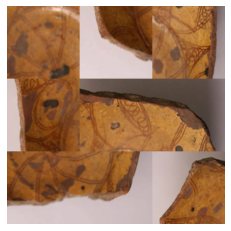

In [6]:
imshow(sample["img"][0])

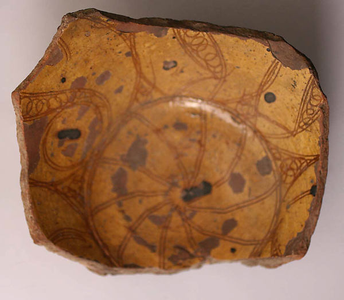

In [8]:
Image.open(os.path.join("data/imet-2020-fgvc7/train", img_name[0]))

In [9]:
sample_preds = model(sample["img"].to(device))
sample_preds_list = []
sample_true_list = []
for i in range(9):
    _, sample_preds_ = torch.max((sample_preds[i]), 1)
    sample_preds_list.append(sample_preds_.item())
    sample_true_list.append(sample[f"perm{i}"].item())
    
print("True:  ", sample_true_list)
print("Preds: ", sample_preds_list)

True:   [4, 6, 5, 3, 1, 2, 7, 8, 0]
Preds:  [4, 6, 5, 3, 1, 2, 7, 8, 0]
